# EDA-Online shoppers intetions 

#### in this phase we would like to exploring our data and preprocessing to get a clean data to be ready for model applying 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data file as csv 

In [6]:
df=pd.read_csv("online_shoppers_intention.csv")

##### Show the first 5 rows of Dataframe 

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool

##### Now we will chicks on nun values existance and data type of attributes 

In [10]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### There are no nun values to deal with it ,, which is great!

##### statistic summary 

In [11]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
df["Month"].replace({"June": "Jun"}, inplace=True)


In [13]:
df["Month"]=="Jun"

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Month, Length: 12330, dtype: bool

###### The target column in our Data is Revenue lets us show the plot 

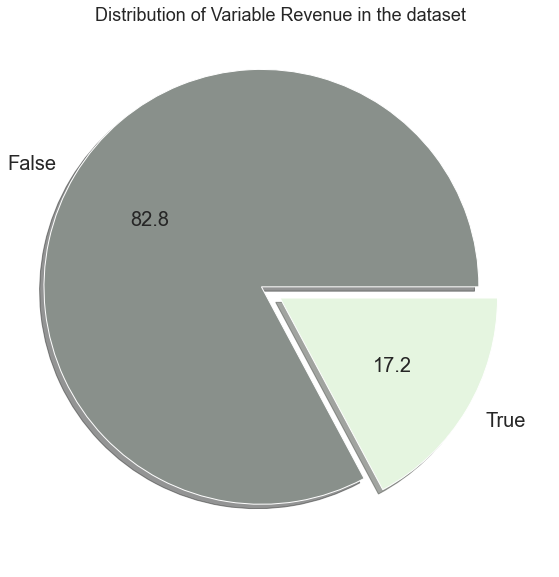

In [73]:
plt.figure(figsize=(10,10))
labels =  ['False', 'True']
plt.pie(df['Revenue'].value_counts(),autopct='%1.1f',textprops={'fontsize': 20},explode =(0.1,0),
       colors=['#89908b','#e5f5e0'],labels=labels,shadow=True)
plt.title('Distribution of Variable Revenue in the dataset', fontsize = 18)
plt.ylabel('')
plt.show()

We can see the number of observations in which the customer ended up not buying is much greater than the number of observations in which the customer ended up completing a transaction. This makes sense, as most purchases generally end without a successful purchase.

In [15]:
df['Administrative_Duration']<0

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Administrative_Duration, Length: 12330, dtype: bool

In [16]:
df['ProductRelated_Duration']<0

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: ProductRelated_Duration, Length: 12330, dtype: bool

In [17]:
df['Informational_Duration']<0

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Informational_Duration, Length: 12330, dtype: bool

In [74]:
df.corr()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative_Duration,1.000000,0.140633,0.160586,-0.022276,-0.230758,0.051964,-0.100633,0.038046,0.054986
Informational_Duration,0.140633,1.000000,0.145640,0.044218,-0.030176,0.015975,-0.020317,0.025504,0.025700
ProductRelated_Duration,0.160586,0.145640,1.000000,0.144878,-0.176037,0.086710,-0.008430,0.000032,0.109964
BounceRates,-0.022276,0.044218,0.144878,1.000000,0.421948,-0.081522,0.087794,-0.002387,-0.083566
ExitRates,-0.230758,-0.030176,-0.176037,0.421948,1.000000,-0.179245,0.104143,-0.063535,-0.170600
PageValues,0.051964,0.015975,0.086710,-0.081522,-0.179245,1.000000,-0.055051,0.012992,0.536967
SpecialDay,-0.100633,-0.020317,-0.008430,0.087794,0.104143,-0.055051,1.000000,-0.020771,-0.057664
Weekend,0.038046,0.025504,0.000032,-0.002387,-0.063535,0.012992,-0.020771,1.000000,0.038148
Revenue,0.054986,0.025700,0.109964,-0.083566,-0.170600,0.536967,-0.057664,0.038148,1.000000


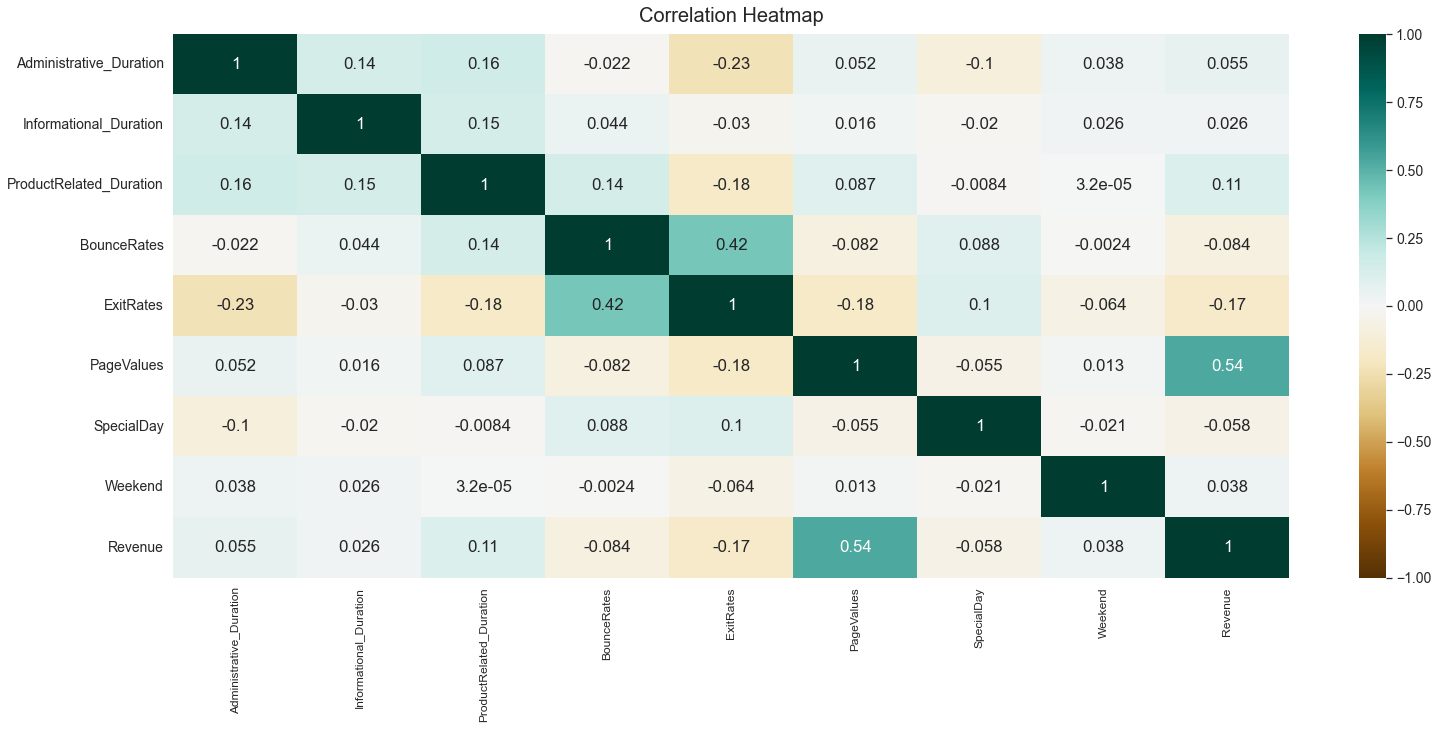

In [75]:

plt.figure(figsize=(25,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt

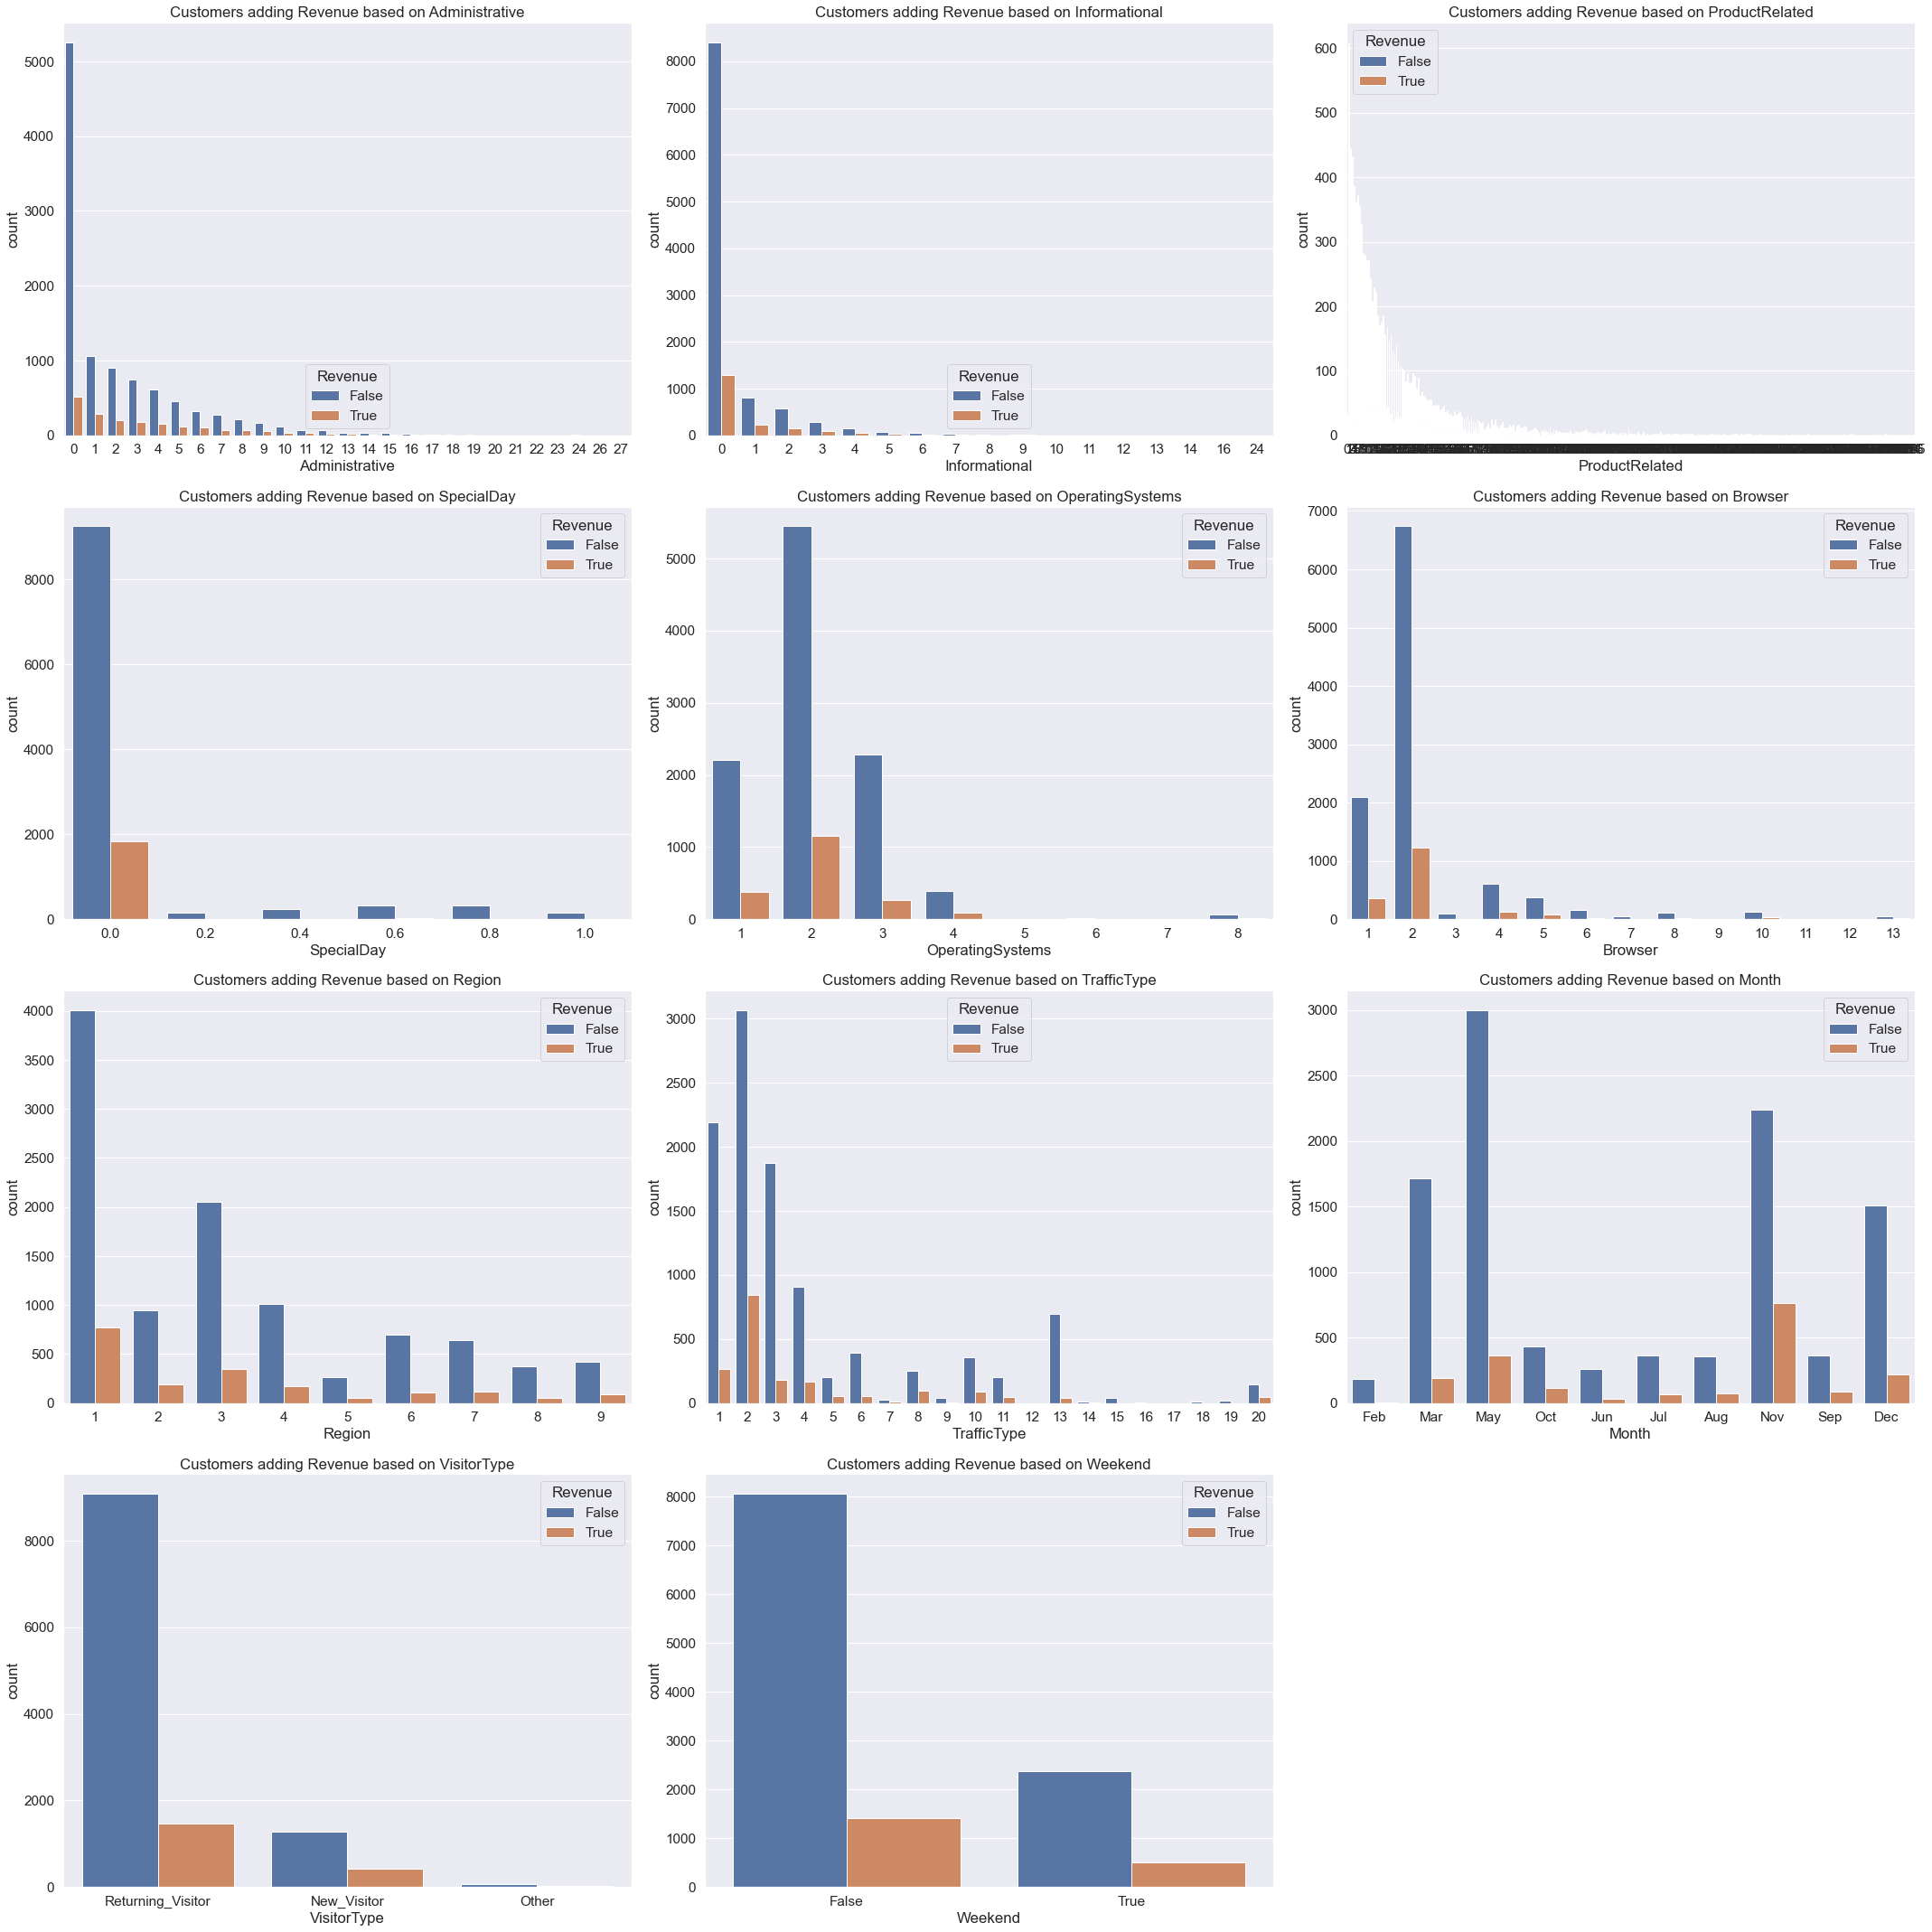

In [18]:
cols=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in cols:
    plot_number = plot_number + 1
    ax = plt.subplot(4, 3, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

Operating systems can identify users of a specific type of computer (Windows users, Mac users, Linux users). This variable is captured by Google Analytics for technical analysis, it is not related to the possibility of buying or not buying, it is observed in the Correlation matrix that there is only a 2% correlation with the Revenue variable, therefore this column is discarded .and the same thing in browser feature where the most customers using brower number 2




The customers who completed transaction tended to browse more and spend more time on Administrative and ProductRelated pages while it seems that they spended less time on Informational pages, which is a bit surprising since it means the majority are loyal customers who added items to the cart and click check-out.

These attributes represent number of pages visited of different types and time spent, It illustrates that only a small portion of visitors choose to dig in information about one product, but the probability to explore more about related products is relatively much higher.

In [52]:
df= df.drop(['OperatingSystems'],axis=1)

In [ ]:
df = df.drop(['Browser'],axis=1)

In [57]:
df = df.drop(['TrafficType'],axis=1)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


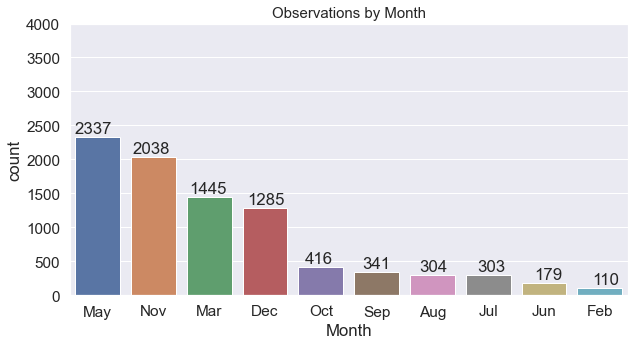

In [60]:
m = df['Month'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(df['Month'], order = m.index)
plt.title('Observations by Month', fontsize = 15)
xval = -.41
plt.ylim(0,4000)

for index, value in m.items():
    plt.text(x = xval, y = value + 50, s = str(value))
    xval += 1.03

January and April are missing in 'Month' column. Visually, several months have many samples (May, November) and a couple have very few samples (February, June).

Text(0.5, 1.0, 'PageValues')

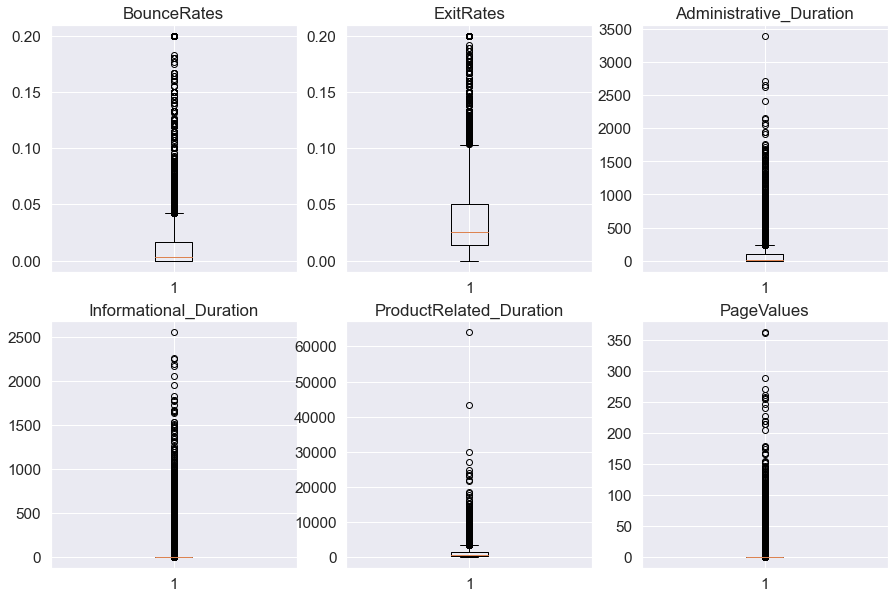

In [32]:
features=df.copy()
plt.figure(figsize = (15, 10))
ax=plt.subplot(231)
plt.boxplot(features['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(features['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(features['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(features['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(features['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(features['PageValues'])
ax.set_title('PageValues')

In [76]:
 numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    df_1 = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df= df.loc[df_1]
    

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


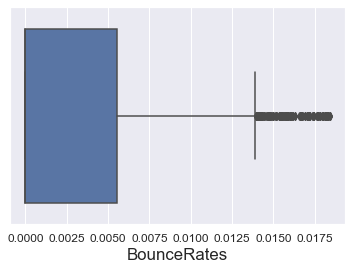

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


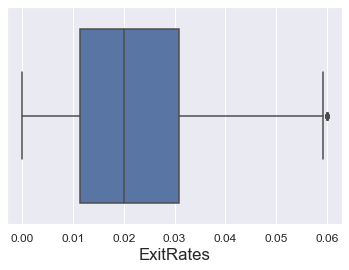

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


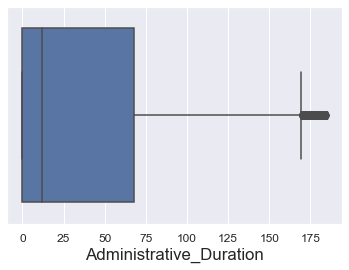

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


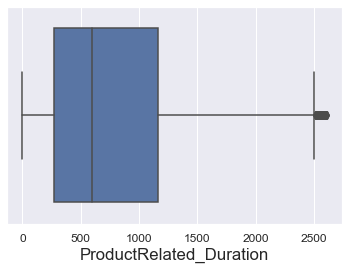

In [77]:
for i in numerical_features:
    sns.boxplot(df[i])
    plt.show()

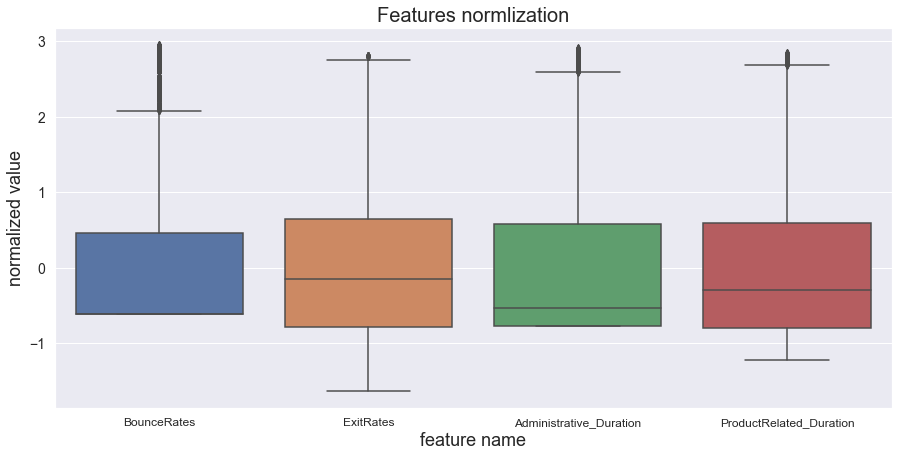

In [78]:
numerical = (df[numerical_features]-df[numerical_features].mean())/df[numerical_features].std()

plt.figure(figsize=(15,7))
ax = sns.boxplot(data=numerical)
ax.set_xticklabels(ax.get_xticklabels())
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.title('Features normlization', fontsize=20)
plt.ylabel('normalized value', fontsize=18)
_ = plt.xlabel('feature name', fontsize=18)